In [26]:
%matplotlib inline
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

# 1 Cotización

In [2]:
cot_all = pd.read_excel('..\\..\\Datos\\cotizaciones_all.xlsx')
cot_all.head()

,ID,Fecha Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Presencial,Remoto,Jefe Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
0,111502,2017-07-27 15:46:54,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Tecnico,NaN,NaN,NaN,0.0,NaN
1,111611,2017-07-29 13:37:05,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-02",No,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN
2,111629,2017-07-29 16:41:15,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-303,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Empleado,NaN,NaN,NaN,0.0,NaN
3,111766,2017-07-31 11:01:57,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",No,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario
4,111794,2017-07-31 15:52:32,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-604,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,4,Profesional,NaN,NaN,NaN,0.0,Constructor Civil


In [67]:
cot_all.columns

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Productos', 'Presencial', 'Remoto', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region',
       'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil',
       'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social',
       'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión'],
      dtype='object')

## 1.1 Utils

In [3]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

## 1.2 Categorical Exploration

### 1.2.1 Medio

0


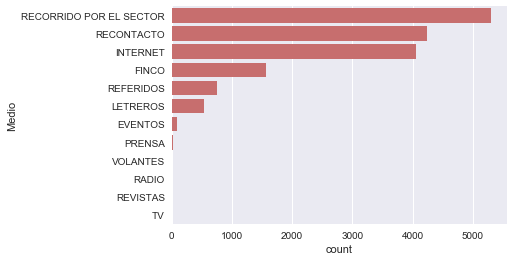

In [44]:
print(cot_all.Medio.isnull().sum())
ver_atributo_categorico(cot_all,'Medio')

0


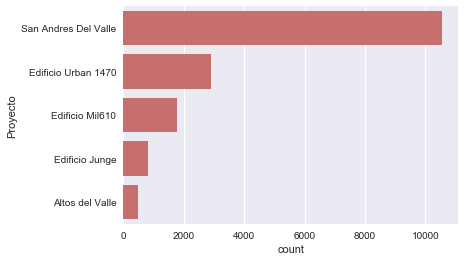

In [45]:
print(cot_all.Proyecto.isnull().sum())
ver_atributo_categorico(cot_all,'Proyecto')

0


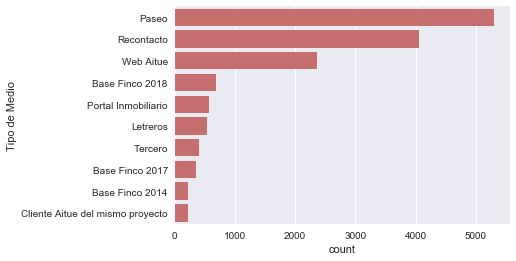

In [46]:
print(cot_all.Proyecto.isnull().sum())
ver_atributo_categorico(cot_all,'Tipo de Medio',lim=10,limit=True)

1869


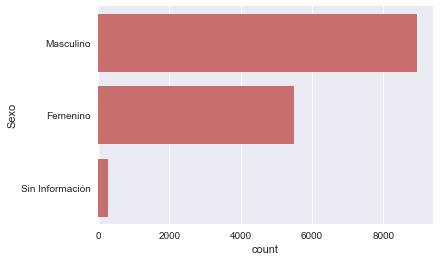

In [47]:
print(cot_all.Sexo.isnull().sum())
ver_atributo_categorico(cot_all,'Sexo')

3310


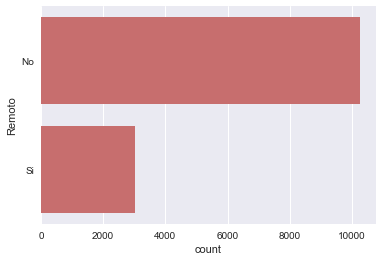

In [48]:
print(cot_all.Remoto.isnull().sum())
ver_atributo_categorico(cot_all,'Remoto')

2027


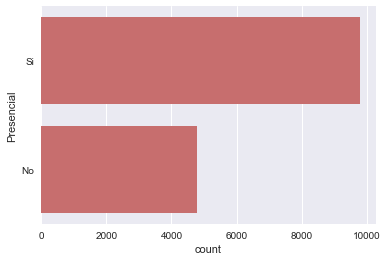

In [49]:
print(cot_all.Presencial.isnull().sum())
ver_atributo_categorico(cot_all,'Presencial')

0


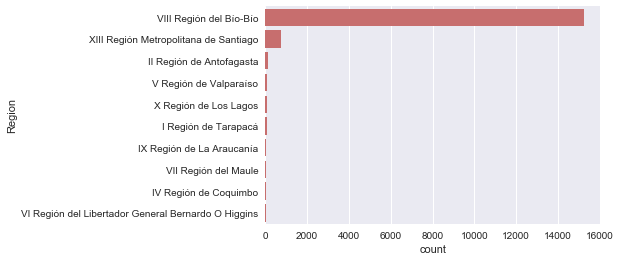

In [50]:
print(cot_all.Region.isnull().sum())
ver_atributo_categorico(cot_all,'Region',lim=10,limit=True)

0


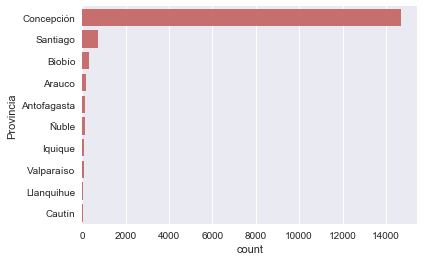

In [51]:
print(cot_all.Provincia.isnull().sum())
ver_atributo_categorico(cot_all,'Provincia',lim=10,limit=True)

0


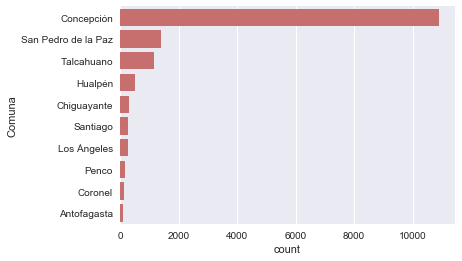

In [52]:
print(cot_all.Comuna.isnull().sum())
ver_atributo_categorico(cot_all,'Comuna',lim=10,limit=True)

2049


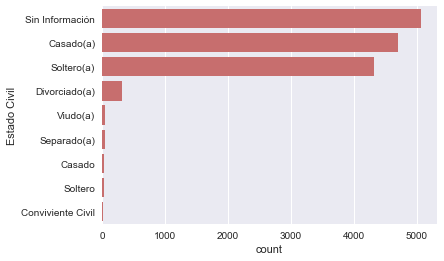

In [54]:
print(cot_all['Estado Civil'].isnull().sum())
ver_atributo_categorico(cot_all,'Estado Civil')

0


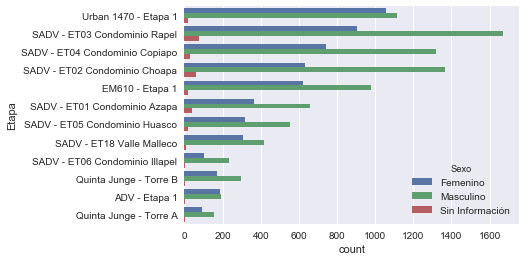

In [55]:
print(cot_all.Etapa.isnull().sum())
palette=["C0","C1","C2"]
ver_atributo_categorico(cot_all,'Etapa',hue='Sexo',palette=palette)

### 1.2.X Actividad

2350
7 ['Tecnico', 'Empleado', 'Profesional', 'Independiente (no profesional)', nan, 'Dueña de casa', 'Estudiante']


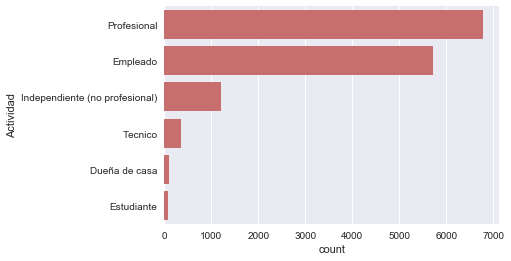

In [42]:
print(cot_all.Actividad.isnull().sum())
ver_atributo_categorico(cot_all,'Actividad',log=True, limit = True, lim=30)

5964


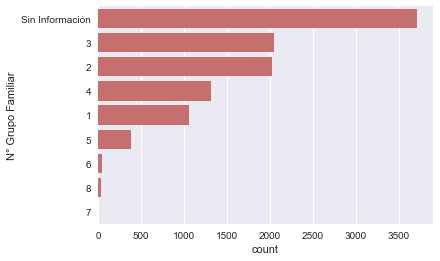

In [56]:
print(cot_all['N° Grupo Familiar'].isnull().sum())
ver_atributo_categorico(cot_all,'N° Grupo Familiar')

13771


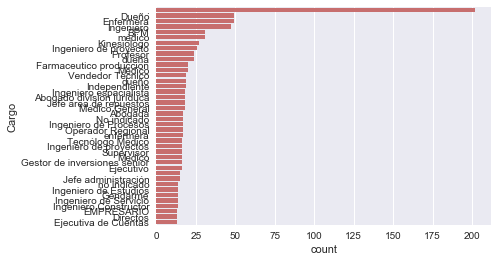

In [57]:
print(cot_all['Cargo'].isnull().sum())
ver_atributo_categorico(cot_all,'Cargo',limit=True,lim=40)

12795


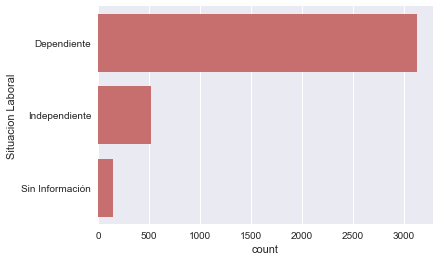

In [58]:
print(cot_all['Situacion Laboral'].isnull().sum())
ver_atributo_categorico(cot_all,'Situacion Laboral')

11744


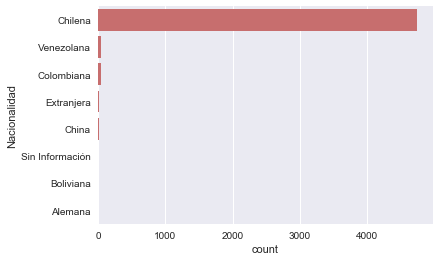

In [59]:
print(cot_all.Nacionalidad.isnull().sum())
ver_atributo_categorico(cot_all,'Nacionalidad')

13588
510 [nan, 'a', 'Norteamericano / USS / UDD', 'Cesfam Lautaro Caceres', 'BioForest S.A.', 'DGAC', 'ACCIONA agua', 'Constructora Aitue \xa0\xa0\xa0', 'Arrigoni Ing.Y Const. S.A', 'Soc. Transportes Maritimo Service Ltda', 'Traumatologico', 'Besalco MD Montajes', 'Management Solutions Limitada', 'Forestal Celco', 'Caufmann', 'Inmobiliaria Los Pellines S.A.', 'MOP', '*', 'DFV Ingeniería y Gestión', 'Clinical Service', 'Hospital de Tomé', 'Municipalidad de Penco', 'Sanatorio Aleman \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Huachipato', 'Catim', 'CAP \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0', 'Municipalidad de Lota', 'Banco Estado', 'SVTI', 'Forestal papelera concepción', 'H&M Hennes & Mauritz SPA', '.', 'Chilena Consolidada seguros generales', 'Sociedad Educacional Juan Bosco LTDA', 'DAEM Hualpen', 'Ausenco Chile LTDA', 'HOSPITAL CLINICO DEL SUR SPA', 'Corporación Adventista \xa0\xa0\xa0\xa0\xa0\xa0\xa0', '\x

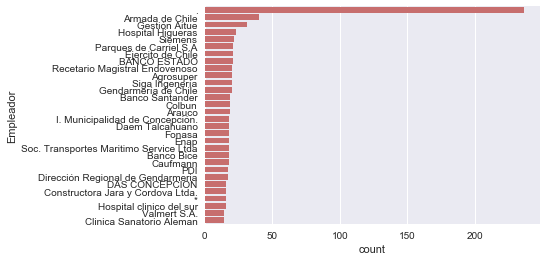

In [60]:
print(cot_all.Empleador.isnull().sum())
ver_atributo_categorico(cot_all,'Empleador',log=True, limit = True, lim=30)

9226
130 [nan, 'Empresario', 'Constructor Civil', 'Traductor e Interprete', 'Matrona', 'Odontólogo', 'Profesor', 'Ingeniería en Biotecnología', 'Otro', 'Ingeniero Eléctrico', 'Técnico en Construcción', 'Fonoaudiólogo', 'Diseño Industrial', 'Mecánico Industrial', 'Empleado Público', 'Enfermería', 'Ingeniero en Administración', 'Contador Auditor', 'Ingeniero Comercial', 'Ingeniero en Construcción', 'Ingeniero', 'Empleado', 'Agronomo', 'Prevencionista de Riesgos', 'Ingeniero Civil Química', 'Administrador', 'Ingeniero Civil Industrial', 'Nutrición y Dietética', 'Tecnólogo Médico', 'Abogado', 'Médico', 'Educadora de Párvulos', 'Administrador Público', 'Periodista', 'Ingeniero de Ejecución', 'Psicólogo', 'Arquitecto', 'Ingeniero Civil Electrónico', 'Ingeniero en Prevención de Riesgo', 'Ingeniero Civil Eléctrico', 'Vendedor', 'Pastor', 'Administración de Empresas', 'Administrativo', 'Docente', 'Ingeniero Agronomo', 'Trabajo Social', 'Ingeniero Biomédica', 'Dueña De Casa', 'Ingeniero Civil en

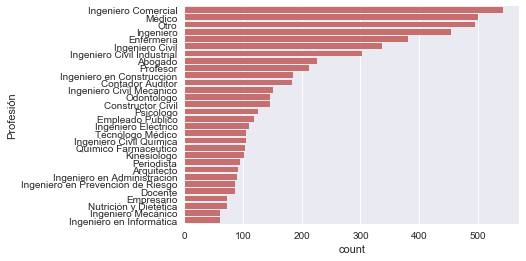

In [64]:
print(cot_all['Profesión'].isnull().sum())
ver_atributo_categorico(cot_all,'Profesión',log=True, limit = True, lim=30)

1
3 ['Natural', 'Jurídico', nan]


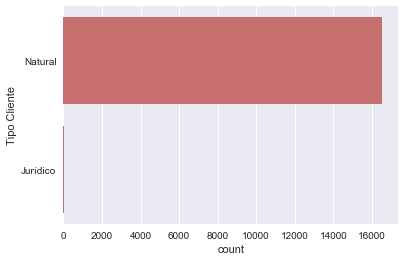

In [65]:
print(cot_all['Tipo Cliente'].isnull().sum())
ver_atributo_categorico(cot_all,'Tipo Cliente',log=True, limit = True, lim=20)

## 1.2 Categorical Exploration

172
36 [0.0, 1.0, 5.0, 2.0, 29.0, 6.0, 3.0, 37.0, 7.0, 13.0, nan, 9.0, 11.0, 10.0, 15.0, 4.0, 20.0, 22.0, 12.0, 8.0, 40.0, 31.0, 18.0, 17.0, 32.0, 16.0, 27.0, 14.0, 24.0, 23.0, 33.0, 19.0, 28.0, 21.0, 30.0, 100.0]


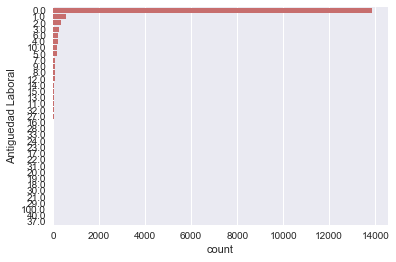

In [66]:
print(cot_all['Antiguedad Laboral'].isnull().sum())
ver_atributo_categorico(cot_all,'Antiguedad Laboral',log=True,lim=False)

In [24]:
#rows
df = cot_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  16592
Columnas:  41
Primer Registro:  2013-08-19 16:58:26
Ultimo Registro:  2018-05-22 13:42:53
Ruts Unicos:  6184


In [82]:
# Cuantas personas no entregaron su profesion
print(len(cot_all.RUT.unique()),cot_all.shape[0])
print(len(cot_all.dropna(axis=0,subset=['Profesión']).RUT.unique()),cot_all.dropna(axis=0,subset=['Profesión']).shape[0] )

6184 16592
2251 7366


In [84]:
# Cuantas personas no entregaron su nro de grupo familiar
print(len(cot_all.RUT.unique()),cot_all.shape[0])
print(len(cot_all.dropna(axis=0,subset=['N° Grupo Familiar']).RUT.unique())
      ,cot_all.dropna(axis=0,subset=['N° Grupo Familiar']).shape[0] )

6184 16592
3579 10628


In [ ]:
cot_all.dropna(axis=1)

## Checking malformed values in attribute

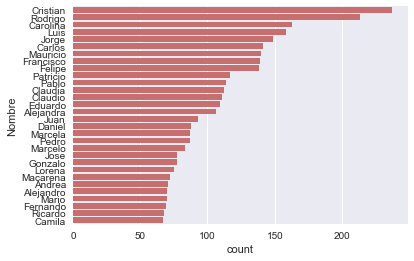

In [27]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Nombre', limit = True, lim=30)
f.savefig('..\\img\\nombre_check.png',bbox_inches='tight')

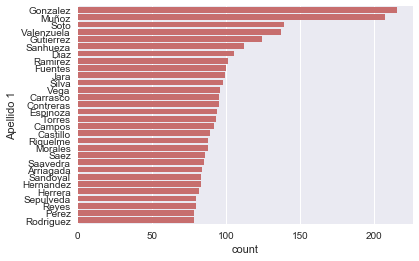

In [29]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 1', limit = True, lim=30)
f.savefig('..\\img\\apellido1_check.png',bbox_inches='tight')

1666 ['Ulloa', 'Torres', 'Manriquez', 'Martinez', 'Gajardo', 'l', '.', 'Campos', 'Fica', 'Pineda', 'Erle', 'Vega', 'Casanova', 'Villegas', 'Herrera', 'Rodriguez', 'Lopez', 'Oliva', 'Cabezas', 'Figueroa', 'Lobos', 'Sanchez', 'Becerra', 'Reyes', 'Miranda', 'Vergara', 'Marianjel', 'Acuña', '*', 'Paredes', 'Larenas', 'Seguek', 'Olivares', '-', 'Guzman', 'Molina', 'Opazo', 'Vilugrón', '..', 'Esparza', 'Vivanco', 'Silva', 'Brañas', 'Quiroga', 'Mora', 'Rojas', 'Nuñez', 'Lazo', 'Ortiz', 'Sandoval', 'Höger', 'Araya', 'Ramirez', 'Cadenas', 'Vera', 'Contreras', 'Hoffmann', 'Cartes', 'Mahuzier', 'Salaberri', 'Hernandez', 'Flores', 'Ilufin', 'Sorensen', 'Romero', 'Jara', 'Suazo', 'Orellana', 'Navarrete', 'Roman', 'Pinto', 'Cottet', 'Irribarra', 'Lecaros', nan, 'Mella', 'Arevalo', 'Aguilera', 'Rios', 'Bolados', 'Vallejos', 'Maldonado', 'Sanchéz', 'Neira', 'Castillo', 'carter', 'Bobadilla', 'Ortega', 'Avello', 'Carmona', 'Carvallo', 'Valenzuela', 'Revello', 'Adonis', 'Martínez', 'Cifuentes', 'Cabrera

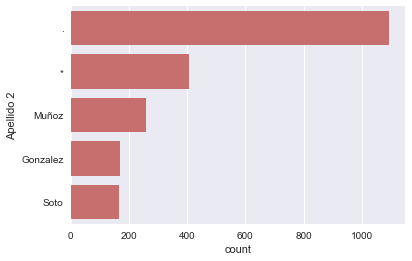

In [30]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 2',log=True, limit = True, lim=5)
f.savefig('..\\img\\apellido2_check.png',bbox_inches='tight')

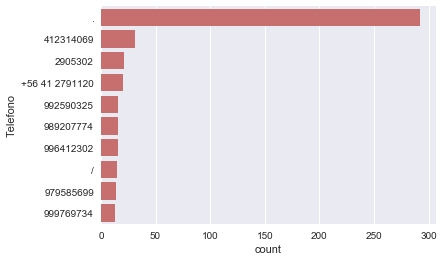

In [31]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Telefono', limit = True, lim=10)
f.savefig('..\\img\\telefono_check.png',bbox_inches='tight')

6038 [953748134, 76374699, 968441156, 2990590, 981372543, 90834457, 958295551, 995072841, 92449494, 942522023, 984192601, 98836621, 956181171, 85480235, 92493350, 968960554, 991280936, 988894560, 94007891, 956282212, 991299568, 988289650, 979575691, 95209394, 993118503, 88305206, 98873258, 95123765, 999684600, 962374072, 93206658, 98446361, 982314411, 987367733, 9981556548, 52080367, 76694924, 994698200, 981496410, 78995130, 950702404, 93090821, 2225841, 964427332, 994486955, 57568731, 981987470, 992953522, 97955039, 975361247, 74540483, 998279335, 987690273, 982085008, 77934502, 990938143, 998472754, 95990362, 974771402, 974878745, 950196206, 982347427, 964328618, 991390292, 961611186, 65991253, 98717377, 981385833, 942051491, 998847907, 942132618, 996412302, 956787113, '+56 9 61227693', 998950598, 99697471, 86651069, 982788710, 95395290, 82344634, 993443523, 89711239, 99999999, 99496404, '+56 9 75181074', 956675683, 990604760, 92749284, 968989297, 99356039, 98760877, 82995455, 981902

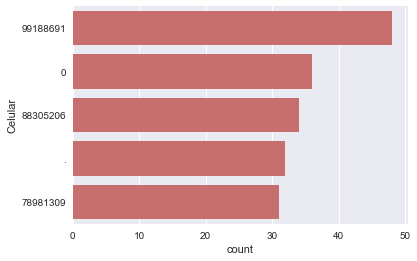

In [33]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Celular',log=True, limit = True, lim=5)
f.savefig('..\\img\\celular_check.png',bbox_inches='tight')

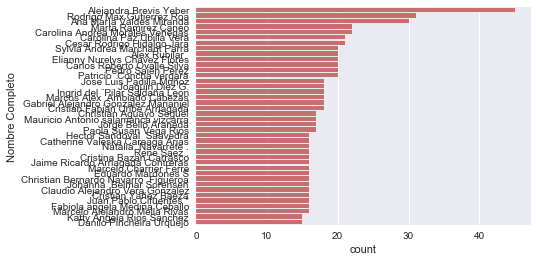

In [32]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Nombre Completo', limit = True, lim=40)
f.savefig('..\\img\\nombrecompleto_check.png',bbox_inches='tight')

In [ ]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])


### 2.4.Describe Data Combined Files: Negociacion

In [ ]:
#columns droped 'Fecha Promesa', 'Telefono', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 
# 'Resciliacion por Modificacion', 'Motivo Desis/Resc', 'Description Desis/Resc'

#columnas no importantes para el sgte paso
unimportant_columns = ['Apellido 1','Apellido 2','Celular','Ejecutivo Comercial','Region','Provincia','Jefe Comercial','ID']
to_select_cols = df.count().sort_values(ascending=True).index.tolist()
to_select_cols = to_select_cols[8:]
to_select_cols = [item for item in to_select_cols if item not in unimportant_columns]
# to_select_cols